In [6]:
import numpy as np
import librosa
import os
import chordsCreation
from os import walk
from matplotlib import pyplot as plt

In [7]:
def get_mfcc(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  mfcc = np.array(librosa.feature.mfcc(y=y, sr=sr))
  return mfcc

def get_melspectrogram(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  melspectrogram = np.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = np.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

In [14]:
example_file = "3c_prog_wav\F_A#dimP_D#sus2G_Bsus2.wav"
y, sr = librosa.load(example_file, offset=0, duration=30)

[Text(0.5, 1.0, 'MFCC pour un La maj')]

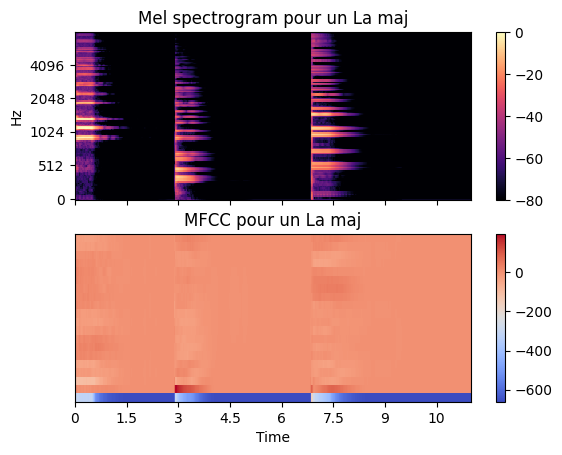

In [15]:
S = get_melspectrogram(example_file)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

mfcc = get_mfcc(example_file)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram pour un La maj')
ax[0].label_outer()
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC pour un La maj')

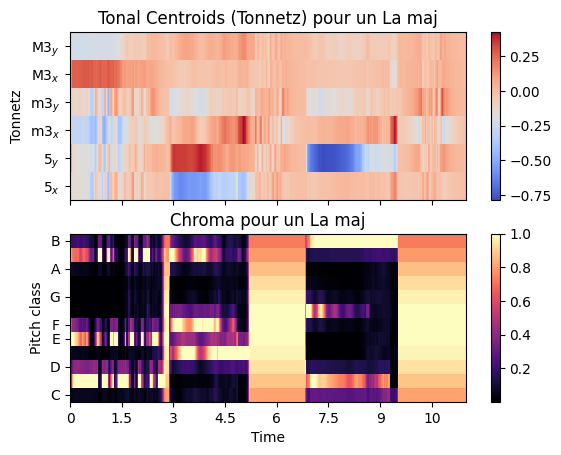

In [16]:
import matplotlib.pyplot as plt
chroma = get_chroma_vector(example_file)
tntz = get_tonnetz(example_file)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tntz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz) pour un La maj')
ax[0].label_outer()
img2 = librosa.display.specshow(chroma,
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma pour un La maj')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

In [63]:
# J'ai gardé les 2 composantes que je trouve les plus logiques ne attendnat d'en savoir plus 
# Va nous renvoyé les 128 freq moyenne, puis les 128 mion et enfin les 128 max
# Va nous renvoyé 12 * 3 = 36 valeurs, les 12 premières correspondent à la moyenne, puis au min et enfin au max

def get_chroma_feature(file_path):
  features = []

  # Extracting mal spectrogram vector feature
  melspectrogram = get_melspectrogram(file_path)
  melspectrogram_mean = melspectrogram.mean(axis=1)
  melspectrogram_min = melspectrogram.min(axis=1)
  melspectrogram_max = melspectrogram.max(axis=1)
  melspectrogram_feature = np.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

  # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  chroma_mean = chroma.mean(axis=1)
  chroma_min = chroma.min(axis=1)
  chroma_max = chroma.max(axis=1)
  chroma_feature = np.concatenate( (chroma_mean, chroma_min, chroma_max) )

  features = np.concatenate( (chroma_feature, melspectrogram_feature) )
  return features 

In [64]:
listeSons = []
for (repertoire, sousRepertoires, fichiers) in walk('chords_wav'):
 listeSons.extend(fichiers)

In [65]:
from tqdm import tqdm  # Importez la bibliothèque tqdm

directory = 'chords_wav'
features = []
labels = []
i = 0

# Utilisez tqdm pour créer une barre de progression
for sons in tqdm(listeSons, desc="Calculating features for each sounds",  position=0):
    file_path = "chords_wav/" + sons

    features.append(get_chroma_feature(file_path))
    labels.append(chordsCreation.chords3sounds[i])
    i += 1


Calculating features for each sounds: 100%|██████████| 102/102 [00:15<00:00,  6.74it/s]
